In [6]:
import pickle
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np

import pymc3 as pm

import arviz as az
import matplotlib.pyplot as pl
from matplotlib import rcParams
from seaborn import heatmap

from pymc_utils import PyMCModel

In [2]:
rcParams['axes.labelsize'] = 16
rcParams['font.size'] = 16
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16

In [3]:
display(HTML("<style>.container {width: 95% !important}</style>"))

In [4]:
bnn_model_path = '../../DEV-ALL/TOA_ML/pickleJar/Models/BayesianBNN/Aphi_ALL_BNN_4_HL1_ARD.pkl'
hs_no_int_path = '../../DEV-ALL/TOA_ML/pickleJar/Models/BayesianRegModels/HS_Prior_No_Int_All_Aphys.pkl'
hs_w_int_path = '../../DEV-ALL/TOA_ML/pickleJar/Models/BayesianRegModels/HS_Prior_With_Int_All_APhys.pkl'

In [7]:
with open(bnn_model_path, 'rb') as f:
    bnn_model = pickle.load(f)['bnn_l1_4HL_411']
with open(hs_no_int_path, 'rb') as f:
    hs_model = pickle.load(f)
with open(hs_w_int_path, 'rb') as f:
    hs_wi_mdl = pickle.load(f)

In [8]:
bnn_model.keys()

dict_keys(['bnn_l1_4HL_411', 'bnn_l1_4HL_443', 'bnn_l1_4HL_489', 'bnn_l1_4HL_510', 'bnn_l1_4HL_555', 'bnn_l1_4HL_670'])

In [9]:
d = bnn_model['bnn_l1_4HL_411']

In [12]:
d.trace_.nchains

2

In [21]:
d.trace_.varnames

['hyp_w_i_1_sd_log__',
 'hyp_w_1_out_sd_log__',
 'hyp_bias_1_sd_log__',
 'wts_i_1_intrmd',
 'wts_1_o_intrmd',
 'bias_1_ordered__',
 'bias_o',
 'sd_log__',
 'hyp_w_i_1_sd',
 'hyp_w_1_out_sd',
 'hyp_bias_1_sd',
 'wts_i_1',
 'wts_1_out',
 'bias_1',
 'layer1_act',
 'out_act',
 'sd']

In [16]:
ppc = pm.sample_ppc(d.trace_, model=d.model)

100%|██████████| 2000/2000 [00:03<00:00, 627.74it/s]


In [20]:
ppc['likelihood'].shape

(2000, 17)

ValueError: color kwarg must have one color per data set. 1 data sets and 17 colors were provided

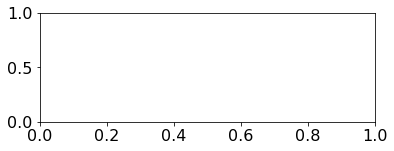

In [18]:
pm.plot_posterior(ppc['likelihood'])